<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/randomforest/05_importancia_predictores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [121]:
sns.set(style="darkgrid")

#**Data**
---

In [122]:
url = 'https://raw.githubusercontent.com/Kaiziferr/datasets/main/cryptojacking.csv'
data = pd.read_csv(url).drop(
    [
        'Unnamed: 0',
        'Name'
        ], axis=1)

In [123]:
data.head()

,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,max_d,min_d,...,first_dp,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type
0,65,TCP,UDP,NaN,18.939,168.173,194.287,7845.126,244.362,0.0,...,443,80.0,123.0,3.0,7.0,22.0,127.0,255.0,1888.00,0
1,18,UDP,TCP,NaN,0.000,0.000,0.000,0.086,0.044,0.0,...,443,53.0,53195.0,1.0,1.0,1.0,37.0,47.0,64.00,0
2,10,UDP,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.0,...,53,39308.0,54454.0,1.0,1.0,1.0,34.0,43.0,61.75,0
3,2771,UDP,TCP,ICMP6,0.000,0.000,0.000,8548.902,149.034,0.0,...,53,5355.0,443.0,1.0,1.0,1.0,39.0,49.0,54.00,0
4,2,UDP,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.0,...,48871,53.0,NaN,1.0,1.0,1.0,37.0,41.0,45.00,0


# **Importancia por pureza de nodos**
---


In [124]:
X = data.drop('Type', axis = 1)
y = data['Type']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = 0.75,
    random_state = 12354,
    shuffle = True
)

In [126]:
columns_categoricas = X_train.select_dtypes(include=['object']).columns.to_list()
columns_numericas = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()

In [127]:
preprocessor = ColumnTransformer(
    [('onehot', OneHotEncoder(handle_unknown='ignore'), columns_categoricas)],
     remainder='passthrough'
)

In [128]:
X_train_prep = preprocessor.fit_transform(X_train)

In [129]:
X_train_prep

array([[1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 6.090750e+03,
        1.162150e+04, 1.715225e+04],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 1.638150e+04,
        2.465000e+04, 3.291850e+04],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 4.800000e+01,
        1.200000e+02, 2.550000e+02],
       ...,
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 4.800000e+01,
        8.400000e+01, 1.840000e+02],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 3.200000e+01,
        3.900000e+01, 9.500000e+01],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 9.330000e+02,
        1.379000e+03, 1.825000e+03]])

In [130]:
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(columns_categoricas)

In [131]:
name_columns = np.concatenate([encoded_cat, columns_numericas])

In [132]:
data_train_exp = pd.DataFrame(X_train_prep, columns=name_columns)

In [133]:
data_train_exp.columns

Index(['First_Protocol_TCP', 'First_Protocol_UDP', 'Second_Protocol_ICMP',
       'Second_Protocol_TCP', 'Second_Protocol_UDP', 'Second_Protocol_nan',
       'Third_Protocol_ICMP', 'Third_Protocol_ICMP6', 'Third_Protocol_nan',
       'Netflows', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp',
       'first_sp', 'second_sp', 'third_sp', 'first_dp', 'second_dp',
       'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib'],
      dtype='object')

In [134]:
data_train_exp = data_train_exp.drop([
    'Second_Protocol_nan',
    'Third_Protocol_nan'
], axis=1)

# **Model**

In [135]:
data_train_exp = data_train_exp.fillna(-1)

In [136]:
model = RandomForestRegressor(
    n_estimators=100,
    max_features = 11,
    criterion='squared_error',
    max_depth= None,
    oob_score= True,
    n_jobs= -1,
    random_state=12354
)

In [137]:
model.fit(data_train_exp, y_train)

RandomForestRegressor(max_features=11, n_jobs=-1, oob_score=True,
                      random_state=12354)

In [138]:
model.feature_importances_

array([8.53732269e-04, 2.38800324e-03, 0.00000000e+00, 2.38619199e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.22686528e-03,
       7.24472953e-03, 6.96467076e-03, 7.09770512e-03, 4.91154698e-03,
       7.87098903e-03, 9.78607301e-03, 7.89986121e-03, 1.94951963e-02,
       5.96655010e-03, 8.26615037e-02, 5.61115188e-03, 4.49638504e-02,
       4.37437594e-02, 3.12704192e-01, 4.48106287e-02, 2.49906257e-02,
       2.30273645e-01, 9.23623191e-02, 1.19548081e-03, 2.75526679e-03,
       3.28502355e-03, 4.51428499e-03, 5.76419859e-03, 1.17311480e-02,
       2.90313697e-03])

In [139]:
importance_features = pd.DataFrame(
    {'predictor': data_train_exp.columns,
     'importancia': model.feature_importances_}
)

In [140]:
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importance_features.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
21,first_sp,0.312704
24,first_dp,0.230274
25,second_dp,0.092362
17,Avg_bpp,0.082662
19,#sp,0.044964
22,second_sp,0.044811
20,#dp,0.043744
23,third_sp,0.024991
15,Avg_bps,0.019495
31,p2_ib,0.011731


In [141]:
model_numericas = RandomForestRegressor(
    n_estimators=100,
    max_features = 11,
    criterion='squared_error',
    max_depth= None,
    oob_score= True,
    n_jobs= -1,
    random_state=12354
)

In [142]:
model_numericas.fit(data_train_exp[columns_numericas], y_train)

RandomForestRegressor(max_features=11, n_jobs=-1, oob_score=True,
                      random_state=12354)

In [143]:
model_numericas.feature_importances_

array([0.00472412, 0.00776454, 0.00736398, 0.00670324, 0.00250441,
       0.00515856, 0.0032437 , 0.00354494, 0.02535388, 0.0047686 ,
       0.10451816, 0.0020923 , 0.07102156, 0.04321166, 0.35316982,
       0.03452365, 0.00565224, 0.23928894, 0.05591031, 0.00052481,
       0.00112445, 0.00142979, 0.00204431, 0.00709097, 0.00409715,
       0.00316992])

In [144]:
importance_features_numericas = pd.DataFrame(
    {'predictor': columns_numericas,
     'importancia': model_numericas.feature_importances_}
)

In [145]:
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importance_features_numericas.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
14,first_sp,0.353170
17,first_dp,0.239289
10,Avg_bpp,0.104518
12,#sp,0.071022
18,second_dp,0.055910
13,#dp,0.043212
15,second_sp,0.034524
8,Avg_bps,0.025354
1,p1_d,0.007765
2,p2_d,0.007364


# **Importancia por permutacion**
---

In [147]:
importance = permutation_importance(
    estimator = model,
    X = data_train_exp,
    y = y_train,
    n_repeats = 5,
    scoring   = 'neg_root_mean_squared_error',
    random_state=12354
)

In [150]:
df_importancia = pd.DataFrame(
                    {
                        k: importance[k] for k in [
                            'importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = data_train_exp.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
21,0.873262,0.007412,first_sp
24,0.616047,0.004408,first_dp
17,0.349074,0.012902,Avg_bpp
25,0.301709,0.004063,second_dp
22,0.193991,0.004912,second_sp
15,0.101635,0.001802,Avg_bps
20,0.073109,0.001435,#dp
7,0.062922,0.003587,Netflows
19,0.060096,0.001256,#sp
12,0.036022,0.001267,max_d


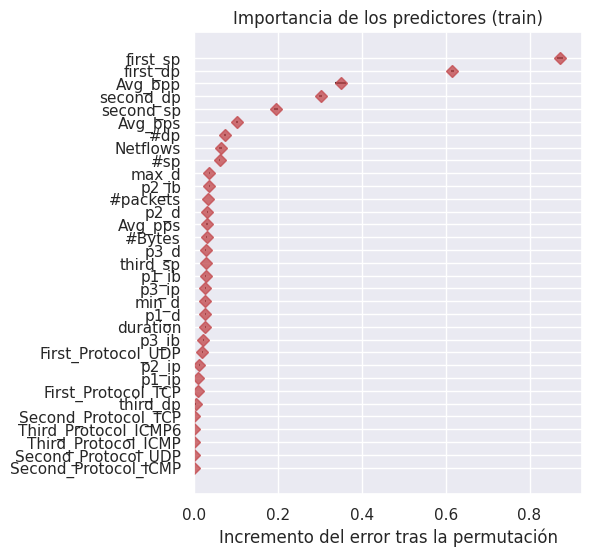

In [151]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');